In [23]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris, load_diabetes, load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from StackingRegressor import StackingRegressor
from sklearn.ensemble import StackingRegressor as SklearnStackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor as SklearnRandomForestRegressor

from sklearn.svm import LinearSVR
import warnings
warnings.filterwarnings("ignore")


In [24]:

# Load datasets
datasets = {
    'iris': load_iris(),
    'wine': load_wine(),
    'Diabetes': load_diabetes()
}

#

In [25]:

results = {}
for name, data in datasets.items():
    X, y = data.data, data.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    estimators = [
    ('ridge', RidgeCV()),
    ('svr', LinearSVR(random_state=42))
    ]
    final_estimator=DecisionTreeRegressor(max_depth=1)
    # Initialize your stacking regressor
    stacking_regressor = StackingRegressor(estimators=estimators, final_estimator=final_estimator, cv=5)
    stacking_regressor.fit(X_train, y_train)

    # Initialize scikit-learn's stacking regressor
    sklearn_stacking_regressor = SklearnStackingRegressor(estimators=estimators,
                                                        final_estimator=final_estimator)

    sklearn_stacking_regressor.fit(X_train, y_train)

    stacking_regressor_pred = stacking_regressor.predict(X_test)
    sklearn_stacking_regressor_pred = sklearn_stacking_regressor.predict(X_test)

    stacking_regressor_score = r2_score(y_test, stacking_regressor_pred)
    sklearn_stacking_regressor_score = r2_score(y_test, sklearn_stacking_regressor_pred)

    results[name] = {
        'Stacking Regressor': stacking_regressor_score,
        'Scikit-learn Stacking Regressor': sklearn_stacking_regressor_score
    }

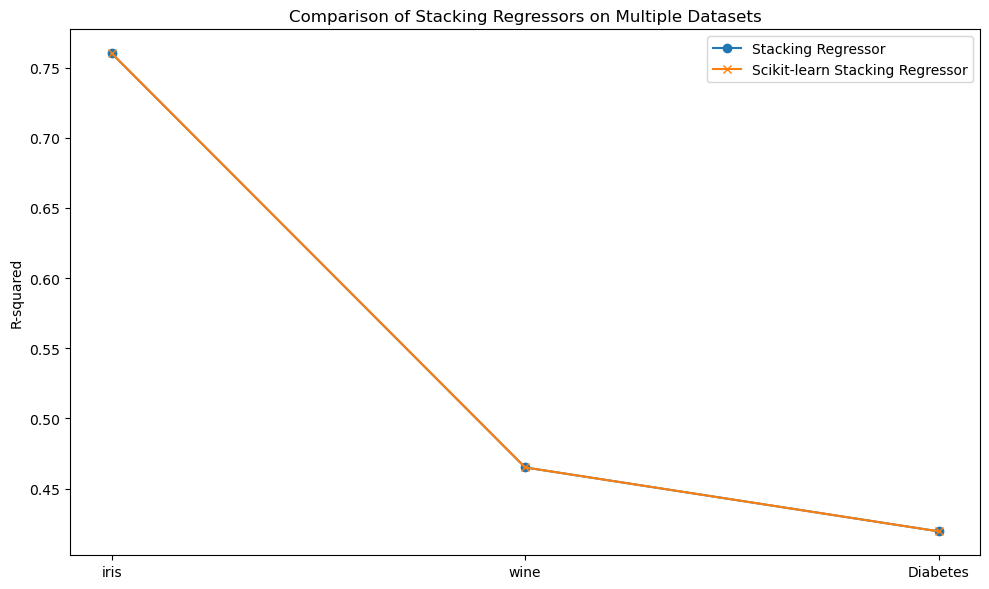

In [26]:

# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))
labels = list(results.keys())
stacking_scores = [results[name]['Stacking Regressor'] for name in labels]
sklearn_stacking_scores = [results[name]['Scikit-learn Stacking Regressor'] for name in labels]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

ax.plot(x, stacking_scores, label='Stacking Regressor', marker='o')
ax.plot(x, sklearn_stacking_scores, label='Scikit-learn Stacking Regressor', marker='x')

ax.set_ylabel('R-squared')
ax.set_title('Comparison of Stacking Regressors on Multiple Datasets')

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()
